In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df=pd.read_csv('crime.csv')
data_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [35]:
# changing column names to variable names that can be easily understood
column_names = ['tot_crime', 'rep_crime', 'pol_fund', '25plus_hs', 'not_hs_grad', 'in_college', 'college']
df_csv = pd.read_csv('crime.csv',
                    names = column_names,
                    header=0
                    )
df_csv.head()

,tot_crime,rep_crime,pol_fund,25plus_hs,not_hs_grad,in_college,college
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [45]:
x = df_csv.drop(['tot_crime','pol_fund','25plus_hs','college'], axis=1).values
y = df_csv['tot_crime'].values

x, y

(array([[ 184,   11,   31],
        [ 213,   11,   43],
        [ 347,   18,   16],
        [ 565,   11,   25],
        [ 327,    9,   29],
        [ 260,    8,   32],
        [ 325,   12,   24],
        [ 102,   13,   28],
        [  38,    7,   25],
        [ 226,    9,   58],
        [ 137,   13,   21],
        [ 369,    4,   77],
        [ 109,    9,   37],
        [ 809,   11,   37],
        [  29,   12,   35],
        [ 245,   10,   42],
        [ 118,   12,   21],
        [ 148,    7,   81],
        [ 387,   15,   31],
        [  98,   15,   50],
        [ 608,   22,   24],
        [ 218,   14,   27],
        [ 254,   20,   22],
        [ 697,   26,   18],
        [ 827,   12,   23],
        [ 693,    9,   60],
        [ 448,   19,   14],
        [ 942,   17,   31],
        [1017,   21,   24],
        [ 216,   18,   23],
        [ 673,   19,   22],
        [ 989,   14,   25],
        [ 630,   19,   25],
        [ 404,   19,   21],
        [ 692,   16,   32],
        [1517,   13,

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [72]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred=ml.predict(x_test)
y_pred

array([898.14359353, 522.41392213, 506.19655461, 751.66890759,
       625.13538265, 837.60048775, 931.30882468, 828.84968044,
       608.50443373, 543.35339042])

In [74]:
ml.predict([[184,11,31]])

array([507.82692982])

In [78]:
from sklearn.metrics import r2_score
print('The R^2 sore is ' + str(r2_score(y_test, y_pred)))

The R^2 sore is 0.21098811362927572


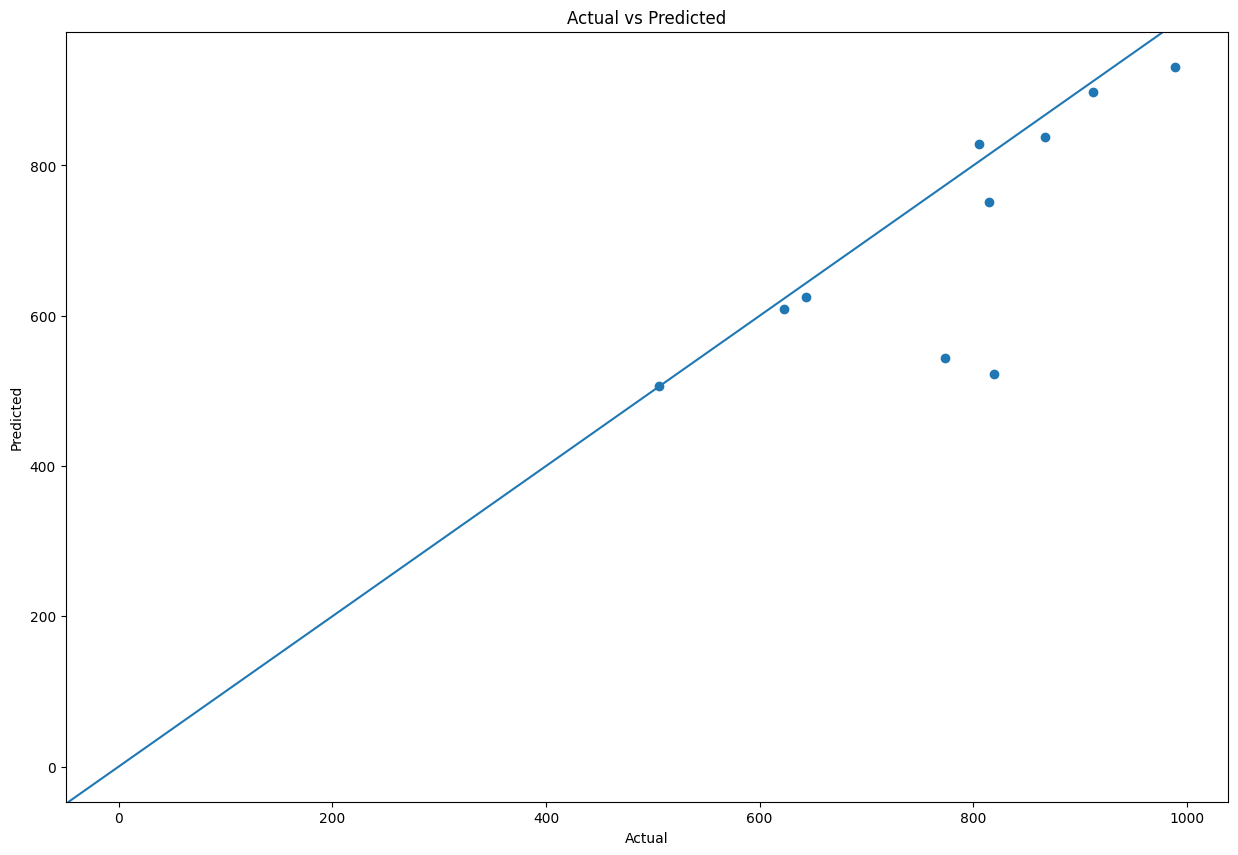

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.axline([ax.get_xlim()[0], ax.get_ylim()[0]], [ax.get_xlim()[1], ax.get_ylim()[1]])

In [79]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df

,Actual Value,Predicted Value,Difference
0,912,898.143594,13.856406
1,819,522.413922,296.586078
2,506,506.196555,-0.196555
3,815,751.668908,63.331092
4,643,625.135383,17.864617
5,867,837.600488,29.399512
6,989,931.308825,57.691175
7,805,828.849680,-23.849680
8,623,608.504434,14.495566
9,773,543.353390,229.646610
